In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[[3.94188011]
 [8.73592461]]


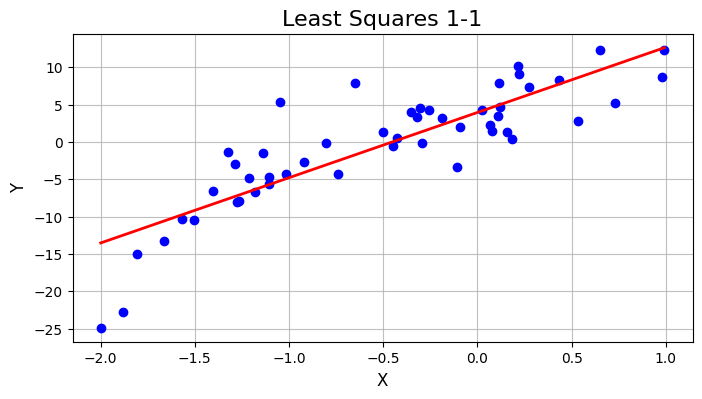

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = pd.read_csv('/content/drive/MyDrive/drive/data0405.csv', usecols=['x']).values.reshape(-1, 1)
y = pd.read_csv('/content/drive/MyDrive/drive/data0405.csv', usecols=['y']).values.reshape(-1, 1)

A = np.hstack([x**0, x])
A = np.asmatrix(A)
#최소제곱법을 이용한 파라미터 계산
w = (A.T*A).I*A.T*y
#파라미터 값
print(w)
#선형 예측 모델
xp = np.linspace(np.min(x), np.max(x))
yp = w[0,0] + w[1,0]*xp


plt.figure(figsize=(8, 4))
plt.plot(x, y, 'bo')
plt.plot(xp, yp, 'r', linewidth = 2, label = 'Linear')
plt.title('Least Squares 1-1', fontsize=16)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.grid(alpha=0.8)
plt.show()

[[ 5.03906362]
 [ 5.27924916]
 [-3.31676315]]


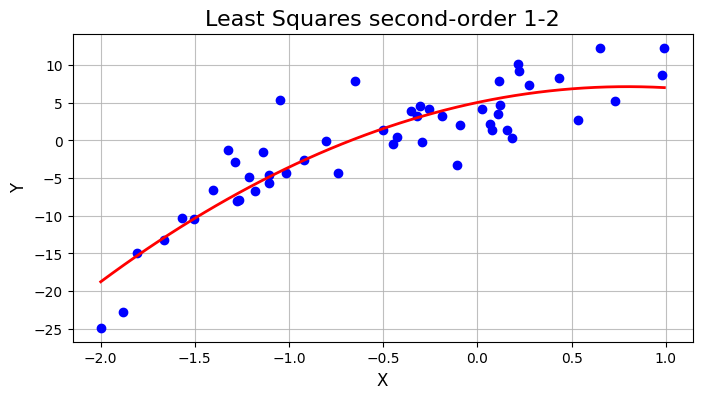

In [27]:
A = np.hstack([x**0, x, x**2])
A = np.asmatrix(A)
#비선형 최소제곱법을 이용한 파라미터 계산
w = (A.T*A).I*A.T*y
#2차 파라미터 값
print(w)

#2차 예측 모델
xp = np.linspace(np.min(x), np.max(x))
yp = w[0,0] + w[1,0]*xp + w[2,0]*xp**2

plt.figure(figsize=(8, 4))
plt.plot(x, y, 'bo')
plt.plot(xp, yp, 'r', linewidth = 2, label = 'Linear')
plt.title('Least Squares second-order 1-2', fontsize=16)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.grid(alpha=0.8)
plt.show()

[[  2.70561069]
 [  8.7466361 ]
 [ 24.11081469]
 [ -7.17740071]
 [-70.59489961]
 [-20.12073822]
 [ 59.53548381]
 [ 36.49128236]
 [ -8.88620274]
 [-11.06845324]
 [ -2.15841396]]


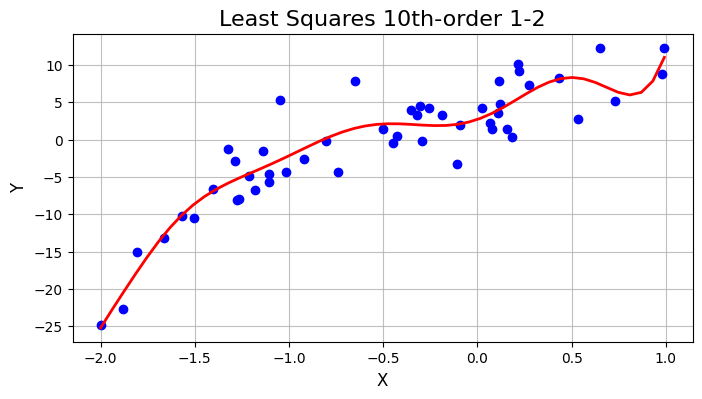

In [31]:
d = 11  #10차

# polynomials basis function matrix build-up
xp = np.linspace(np.min(x), np.max(x)).reshape(-1, 1)
polybasis = np.hstack([xp**i for i in range(d)])
polybasis = np.asmatrix(polybasis)

# w를 구하는 과정
A = np.hstack([x**i for i in range(d)])
A = np.asmatrix(A)

w = (A.T*A).I*A.T*y  # 학습(최소제곱법)

print(w) #10차 파라미터 값

yp = polybasis*w  # polybasis 함수와 w의 선형 결합

plt.figure(figsize=(8, 4))
plt.plot(x, y, 'bo')
plt.plot(xp, yp, 'r', linewidth = 2, label = 'Linear')
plt.title('Least Squares 10th-order 1-2', fontsize=16)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.grid(alpha=0.8)
plt.show()

[2.23603262] [0.06825886]


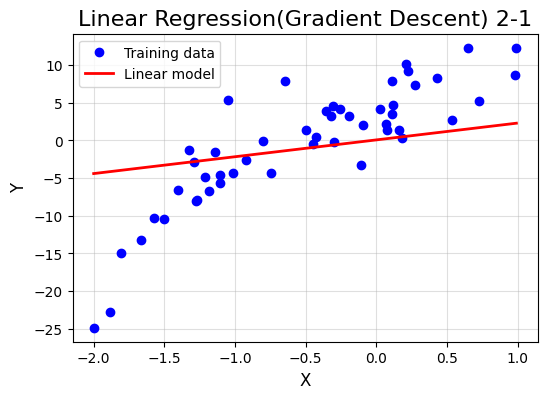

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = pd.read_csv('/content/drive/MyDrive/drive/data0405.csv', usecols=['x']).values.reshape(-1, 1)
y = pd.read_csv('/content/drive/MyDrive/drive/data0405.csv', usecols=['y']).values.reshape(-1, 1)

A = np.hstack([x**0, x])  # data x의 앞에 1을 horizontal 방향으로 추가
A = np.asmatrix(A)

#print('A :\n', A)

w1 = 0       # 기울기
w0 = 0       # 절편

lrate = 0.001  # 학습률(Learning rate) --> α
epochs = 500 # 반복 횟수

n = float(len(x)) # 입력 데이터의 개수

# 경사 하강법
for i in range(epochs):
    y_pred = w1*x + w0  		          	# 선형 회귀 예측값
    dw1 = (1/n) * sum(x * (y_pred-y)) 	# 넘파이 배열간의 산술 계산은 요소별로 적용
    dw0 = (1/n) * sum(y_pred-y)  	      # sum()은 모든 요소들의 합을 계산하는 내장 함수
    w1 = w1 - lrate * dw1           		# 기울기 update
    w0 = w0 - lrate * dw0  		          # 절편 update
print (w1, w0)                          # 파라미터 값

plt.figure(figsize = (6, 4))
plt.title('Linear Regression(Gradient Descent) 2-1', fontsize = 16)
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.plot(x, y, 'bo', label = "Training data")

xp = np.linspace(np.min(x), np.max(x)).reshape(-1, 1)
y_pred = w1*xp + w0  # 예측값을 만든다.
#print(y_pred)
plt.plot(xp, y_pred, 'r', linewidth = 2, label = "Linear model")
plt.legend()
plt.grid(alpha = 0.4)
plt.show()



2차 회귀 파라미터:
 [[ 5.03915374]
 [ 5.2786459 ]
 [-3.31720802]]


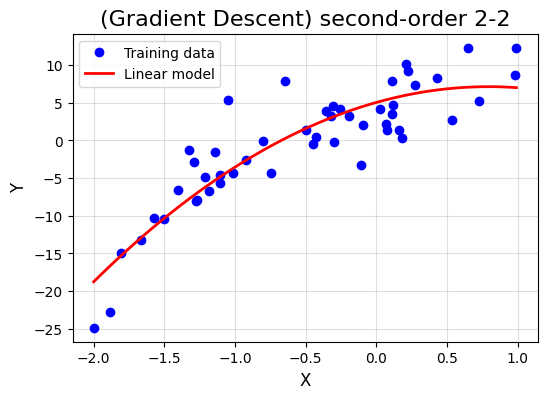

In [43]:
order = 2 # 2차

# 디자인 행렬 A 구성: [1, x, x^2, ..., x^degree]
A = np.hstack([x**i for i in range(order + 1)])
A = np.asmatrix(A)
m = y.shape[0]

# 파라미터 초기화
w = np.random.randn(order + 1, 1)
w = np.asmatrix(w)


alpha = 0.001
epochs = 500

# 경사하강법 수행
for _ in range(epochs):
    dJ = 2 * (A.T * A * w - A.T * y)
    w = w - alpha * dJ

# 결과 출력
print(f'{order}차 회귀 파라미터:\n', w)

# 예측용 데이터 및 결과 계산
xp = np.linspace(np.min(x), np.max(x)).reshape(-1, 1)
Ap = np.hstack([xp**i for i in range(order + 1)])
Ap = np.asmatrix(Ap)
yp = Ap * w

plt.figure(figsize = (6, 4))
plt.title('(Gradient Descent) second-order 2-2', fontsize = 16)
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.plot(x, y, 'bo', label = "Training data")

#print(yp)
plt.plot(xp, yp, 'r', linewidth = 2, label = "Linear model")
plt.legend()
plt.grid(alpha = 0.4)
plt.show()

4차 회귀 파라미터:
 [[ 1.00583304e+23]
 [-1.50175877e+23]
 [ 2.48460478e+23]
 [-4.19204806e+23]
 [ 7.36063741e+23]]


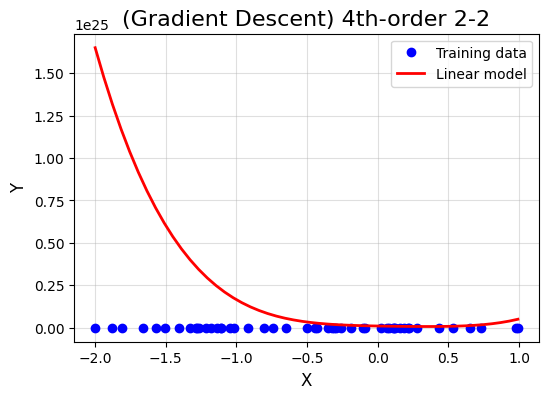

In [46]:
order = 4 # 4차

# 디자인 행렬 A 구성: [1, x, x^2, ..., x^degree]
A = np.hstack([x**i for i in range(order + 1)])
A = np.asmatrix(A)
m = y.shape[0]

# 파라미터 초기화
w = np.random.randn(order + 1, 1)
w = np.asmatrix(w)


alpha = 0.001
epochs = 500

# 경사하강법 수행
for _ in range(epochs):
    dJ = 2 * (A.T * A * w - A.T * y)
    w = w - alpha * dJ

# 결과 출력
print(f'{order}차 회귀 파라미터:\n', w)

# 예측용 데이터 및 결과 계산
xp = np.linspace(np.min(x), np.max(x)).reshape(-1, 1)
Ap = np.hstack([xp**i for i in range(order + 1)])
Ap = np.asmatrix(Ap)
yp = Ap * w

plt.figure(figsize = (6, 4))
plt.title('(Gradient Descent) 4th-order 2-2', fontsize = 16)
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.plot(x, y, 'bo', label = "Training data")

#print(yp)
plt.plot(xp, yp, 'r', linewidth = 2, label = "Linear model")
plt.legend()
plt.grid(alpha = 0.4)
plt.show()

LASSO 회귀 파라미터 (4차):
[[ 1.16931735]
 [ 3.71105923]
 [-0.69339397]
 [ 1.49789831]
 [-0.44033313]]


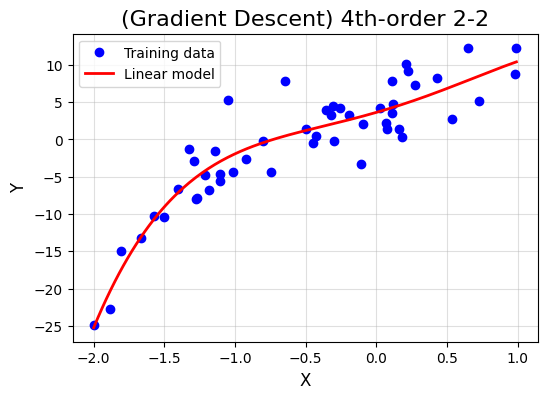

In [47]:
import cvxpy as cvx

# 데이터 표준화
x_mean = np.mean(x)
x_std = np.std(x)
x_norm = (x - x_mean) / x_std

# 4차
order = 4

# 4. 디자인 행렬 A 구성 (x^0, x^1, ..., x^4)
A = np.hstack([x_norm**i for i in range(order + 1)])
A = np.asmatrix(A)

# 5. LASSO 회귀 설정
w = cvx.Variable((order + 1, 1))        # 파라미터 벡터
lambda_lasso = 0.1                     # L1 정규화 강도 (값을 조절해도 됨)


objective = cvx.Minimize(cvx.norm2(A @ w - y)**2 + lambda_lasso * cvx.norm1(w))
problem = cvx.Problem(objective)
problem.solve()

# 파라미터 값
w_val = w.value
print(f"LASSO 회귀 파라미터 (4차):\n{w_val}")

# 6. 예측용 입력 생성 (원래 x 기준)
xp = np.linspace(np.min(x), np.max(x), 200).reshape(-1, 1)
xp_norm = (xp - x_mean) / x_std  # 동일하게 정규화
Ap = np.hstack([xp_norm**i for i in range(order + 1)])
Ap = np.asmatrix(Ap)

# 예측값 계산
yp = Ap @ w_val


plt.figure(figsize = (6, 4))
plt.title('(Gradient Descent) 4th-order 2-2', fontsize = 16)
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.plot(x, y, 'bo', label = "Training data")

#print(yp)
plt.plot(xp, yp, 'r', linewidth = 2, label = "Linear model")
plt.legend()
plt.grid(alpha = 0.4)
plt.show()